# Solutions to Introduction to Programming

Solutions to the first exercise (hand computation, basically): the exercise is to create the cells, input the numbers and the + sign into them, make sure it's a "Code" cell, then hold down the CTRL (Command) key and hit ENTER to have the addition executed.

In [1]:
1

1

In [2]:
0+1

1

In [3]:
1+1

2

In [4]:
1+2

3

In [5]:
2+3

5

In [6]:
3+5

8

In [7]:
5+8

13

In [8]:
8+13

21

In [9]:
13+21  # One more than was asked for

34

In [10]:
Lucas_List = [2,1]
for i in range(2,31):
    nxt = Lucas_List[i-1]+Lucas_List[i-2]
    Lucas_List.append(nxt)
print( Lucas_List )

[2, 1, 3, 4, 7, 11, 18, 29, 47, 76, 123, 199, 322, 521, 843, 1364, 2207, 3571, 5778, 9349, 15127, 24476, 39603, 64079, 103682, 167761, 271443, 439204, 710647, 1149851, 1860498]


From the [Online Encyclopedia of Integer Sequences, sequence A000032](https://oeis.org/A000032), we have that the Lucas sequence starts off with 2, 1, 3, 4, 7, 11, 18, 29, 47, 76, 123, 199, 322, 521, 843, 1364, 2207, 3571, 5778, 9349, 15127, 24476, 39603, 64079, 103682, 167761, 271443, 439204, 710647, 1149851, 1860498, 3010349, 4870847, 7881196, 12752043, 20633239, 33385282, 54018521, 87403803 .  The output of the program above agrees, as far as it goes.

In [11]:
Lucas_List = [2,1]
i = 2
while i<31:
    nxt = Lucas_List[i-1]+Lucas_List[i-2]
    Lucas_List.append(nxt)
    i += 1
print( Lucas_List )

[2, 1, 3, 4, 7, 11, 18, 29, 47, 76, 123, 199, 322, 521, 843, 1364, 2207, 3571, 5778, 9349, 15127, 24476, 39603, 64079, 103682, 167761, 271443, 439204, 710647, 1149851, 1860498]


The output is exactly the same as before.

In [12]:
Narayana_cows = [1,1,1]
for i in range(3,31):
    nxt = Narayana_cows[i-1] + Narayana_cows[i-3]
    Narayana_cows.append(nxt)
print( Narayana_cows )

[1, 1, 1, 2, 3, 4, 6, 9, 13, 19, 28, 41, 60, 88, 129, 189, 277, 406, 595, 872, 1278, 1873, 2745, 4023, 5896, 8641, 12664, 18560, 27201, 39865, 58425]


Comparing with the initial numbers at [the OEIS entry for A000930](https://oeis.org/A000930), namely, 1, 1, 1, 2, 3, 4, 6, 9, 13, 19, 28, 41, 60, 88, 129, 189, 277, 406, 595, 872, 1278, 1873, 2745, 4023, 5896, 8641, 12664, 18560, 27201, 39865, 58425, 85626, 125491, 183916, 269542, 395033, 578949, 848491, 1243524, 1822473, 2670964, 3914488, 5736961, 8407925, we see that the numbers are the same, as far as they go.

A google search turns up the [following Turtle Geometry in Python Fibonacci Spiral](https://youtu.be/AH6fygto3Mk) by DavisMT, which is a bit more advanced than we had in mind; but it works.

For the new spiral, we need a bit of pen-and-paper work first to work out the angles, and a consistent numbering scheme.  If we make one vertex of each triangle be the origin, it makes a nice picture with the triangles successively touching each other.  In this case it will work out better if we draw the picture first, then explain the code that drew the picture.

[0.0, 0.7227342478134157, 0.5856855434571508, 0.6435011087932843, 0.6223684885550206, 0.630568739599553]
0.6283185307179586


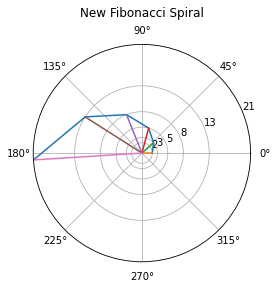

In [13]:
# Isosceles Fibonacci Triangle Spiral
Final_Triangle = 7  # We will draw triangles from the flat one on, and stop at a "Final Triangle"
# We will need one more Fibonacci number than triangles (because we throw the first one away )
Fibonacci = [0,1]
for i in range(2,Final_Triangle+2):
    nxt = Fibonacci[i-1]+Fibonacci[i-2]
    Fibonacci.append(nxt)
angle_cosines = [ Fibonacci[i]/(2*Fibonacci[i-1]) for i in range(3,Final_Triangle+2)]

# When writing this solution, print statements like the following 
# were very useful for debugging.  We have left them in, but commented them out
# so Python does not execute them (but you can see them)
# print( angle_cosines )

import numpy as np

# These are the small angles in the isosceles triangles
angles = [np.arccos(t) for t in angle_cosines ]

print( angles )  # Actually there is something interesting about these angles
print( np.pi/5 )

# We need the cumulative sums of those angles for our spiral
theta = np.cumsum( angles )

#print( theta )
r = [ Fibonacci[i] for i in range(3,Final_Triangle+2)]
#print( r, r[-1] )

import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}) # same as before
# Plot the spiral (ie the outermost points of each triangle)
ax.plot(theta, r) # same as before

# Now plot the long sides of each triangle
for i in range(len(r)):
    ax.plot([0,theta[i]], [0, r[i]])

ax.set_rmax(r[-1]) # 
ax.set_rticks(r)  # Show Fibonacci radii for our plot
#ax.set_rlabel_position(-22.5)  # don't need this command
ax.grid(True) # same as before

ax.set_title("New Fibonacci Spiral", va='bottom') # change the title
plt.show()

There's lots to talk about in that code.  The "cumsum" function has an odd name (the same name as the corresponding function in Matlab) but it just replaces a list [x, y, z, w] with another list [x, x+y, x+y+z, x+y+z+w].  So, simple but useful.  We needed it because the _direction_ the final triangle is pointing has as its angle the sum of its internal angle plus all the angles of the previous triangles: the cumulative sum, in other words.  The final entry in a list can be referred to by asking for the "-1" entry, viz: r[-1] gives us the largest radius.  The counting was hard, because there is no (0,0,1) triangle, and the (1,1,2) triangle is flat and has internal angles 0 or 180 degrees (0 or $\pi$ radians, and of course the trig functions in Python use radians).  Python chose the colours of the lines, because we didn't specify them; the labels are a bit squashed up because we didn't try very hard to make this spiral pretty.  We _expect_ that you can already do better than this program.

We did not try to draw a smooth curve through the points, but a polar curve with radius $\phi^t/\sqrt{5}$ and angle linear in $t$ can be made to match these points pretty closely.  That's also not a bad exercise.

The interesting fact alluded to above, when we printed the angles, was that they very quickly settle down to $\pi/5$.  This is because $F_n/(2F_{n-1})$ very quickly settles down to $\phi/2$, and, which is a surprising fact, the angle whose cosine is $\phi/2$ is $\pi/5$.  There is a square root of 5 in $\phi$, and a $5$ in the radian measure of its arccosine; is this a coincidence?  You might want to try to _prove_ to yourself that these facts are true; if you manage it, you might simultaneously find a reason (or alternatively decide that it is, in fact, just a coincidence).  But that sort of thing is much more like traditional math, and so we reluctantly do not pursue it here.